## Notebook 2: Basic Python Programming Skills


## 1. Introduction

The goals for today's lecture are to work through some basic features of Python programming, and explore different variable types.  There is SO much to learn, and so many ways of doing the same thing but with different codes, that we're going to focus on the basics for inferential data analysis.  

### 1.1 The Python Difference

One of the challenging things about using open source technologies is that it is rarely presented as a "complete" software package.  If you're working in Excel, you don't need to go outside of the program to insert a "square root of the sum of squares" equation, for example.  It's a function in Excel. With open source software, different functions are created by different programmers, and we often have to "call" in that external program to do what we want. These are called libraries.

Some important libraries in Python are:

>**numpy**: used for math and logic operations.

>**pandas**: used for the storing and basic handling of data.

>**matplotlib**: used for data visualization, creating plots, graphs, etc.

>**math**: from datascience, a collection of math functions

We install these libraries with the following commands. The abbreviation will be what we use to "call" functions that belong to that library.  As we start to get more sophisticated, we'll call ever more libraries into our Python notebooks. 

### NOTE: If you are working in the desktop version of Python, you will have to install the libraries first. 

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib as plt
%matplotlib inline


pd.options.display.float_format = '{:.2f}'.format

### 1.2 Introduction to Tables

A table is a fundamental object type for representing data sets. In Python, tables are presented as a collection of ***arrays***, with each array describing a different attribute for every observation in a dataset. 

Concretely, an array is a **collection of values of the same type**, like a column in an Excel spreadsheet. 

<img src="excel_array.jpg" width="300">

Let's tell Python to make an array object, and then manipulate that array by multiplying by 100.

In [2]:
array = np.array([1, 2, 3, 4, 5])
array

array([1, 2, 3, 4, 5])

In [3]:
array2=array*100
array2

array([100, 200, 300, 400, 500])

### 1.3 PANDAS

<img src="panda.jpeg" width="300">

No, not those pandas.  In Python, the word "panda" is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. With pandas, we can clean, transform and analyze our data.  While computer programmers often work with other forms of data, when we are doing planning data analysis, we are almost always working in pandas.

The building block of pandas are "series" - a one-dimensional labeled indexed array.  A dataframe is a multi-dimensional table made up of a collection of series.

<img src="Series.png" width="300">

In [4]:
#Let's add some data.  In this cell, I've a) created an array called "data"
# b) set up two series (apples and oranges)
# and c) assigned 4 values to each series
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
#in this next line, I'm telling Python to print the object I've created
data

{'apples': [3, 2, 0, 1], 'oranges': [0, 3, 7, 2]}

In [5]:
#now, I'm going to assign that array of values to a dataframe.
df = pd.DataFrame(data)
df

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


#### Note how Python has indexed my values - you can think of a dataframe as an Excel worksheet.  Just like Excel, it is assigning row numbers to each observation, but in this case, the row numbers start with 0 rather than 1.  

## 2.0 Bringing a CSV file into Python

Python can read in multiple forms of data, but the most common is a .csv file ("comma separated values").  We can easily import .csv data into Python.  The "pd." tells Python to call up the panda function (this is like vocabulary - something to learn), to read the file as a csv, the name of the file, and that the delimiter is a comma. (A delimiter is what separates each of the columns, or array values, from one another.)

(We are able to put the name of the CSV file alone as the parameter rather than the full file path since our file is in the same folder as our Python file.)

In [28]:
pd.read_csv('CHISextract2022.csv', delimiter = ',')

,AB1,AJ105,AK23,AK25,AM19,AM20,AM21,AK28,AM45,AM48,...,OCCMAIN2,AHEDC_P1,AK22_P1,AK3_P1V2,HHSIZE_P1,OMBSRR_P1,RACECN_P1,SRAGE_P1,TIMEAD_P1,TIMENEV2_P1
0,2,-1,1,1,3,4,3,3,4,2,...,-1,4,2,-1,3,1,1,55,17,-1
1,2,-1,3,2,3,3,3,2,2,2,...,99,8,8,7,1,1,1,30,13,13
2,2,-1,1,2,2,3,2,1,5,2,...,7,7,7,2,1,2,5,65,13,13
3,3,1,1,1,3,3,1,2,1,2,...,-1,2,6,-1,6,1,1,55,18,-1
4,3,-1,1,1,1,4,1,2,5,2,...,10,6,9,6,1,2,5,55,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24448,2,-1,3,2,3,1,2,1,3,2,...,5,3,1,6,1,3,4,30,15,-1
24449,4,1,3,2,2,2,2,2,4,2,...,5,1,3,6,2,1,5,40,17,-1
24450,4,-1,3,2,2,2,3,3,3,1,...,-1,9,12,-1,2,3,4,60,2,2
24451,4,1,3,2,2,2,2,3,5,2,...,5,3,1,2,2,1,5,60,13,13


Right now, all we've done is read the .csv, but what we want is to bring the data into Python so we can manipulate the columns. Similar to an Excel worksheet, pandas calls this database a "dataframe". Programmers often use df to signal that the data are in a dataframe - we're going to follow this convention, and assign our .csv the name "chis_df". 

In [29]:
chis_df = pd.read_csv('CHISextract2022.csv', delimiter = ',')

In [30]:
#let's take a look at our data
chis_df

,AB1,AJ105,AK23,AK25,AM19,AM20,AM21,AK28,AM45,AM48,...,OCCMAIN2,AHEDC_P1,AK22_P1,AK3_P1V2,HHSIZE_P1,OMBSRR_P1,RACECN_P1,SRAGE_P1,TIMEAD_P1,TIMENEV2_P1
0,2,-1,1,1,3,4,3,3,4,2,...,-1,4,2,-1,3,1,1,55,17,-1
1,2,-1,3,2,3,3,3,2,2,2,...,99,8,8,7,1,1,1,30,13,13
2,2,-1,1,2,2,3,2,1,5,2,...,7,7,7,2,1,2,5,65,13,13
3,3,1,1,1,3,3,1,2,1,2,...,-1,2,6,-1,6,1,1,55,18,-1
4,3,-1,1,1,1,4,1,2,5,2,...,10,6,9,6,1,2,5,55,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24448,2,-1,3,2,3,1,2,1,3,2,...,5,3,1,6,1,3,4,30,15,-1
24449,4,1,3,2,2,2,2,2,4,2,...,5,1,3,6,2,1,5,40,17,-1
24450,4,-1,3,2,2,2,3,3,3,1,...,-1,9,12,-1,2,3,4,60,2,2
24451,4,1,3,2,2,2,2,3,5,2,...,5,3,1,2,2,1,5,60,13,13


In [9]:
#we can get information about our dataset by calling the "info()" function
chis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24453 entries, 0 to 24452
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AB1          24453 non-null  int64
 1   AJ105        24453 non-null  int64
 2   AK23         24453 non-null  int64
 3   AK25         24453 non-null  int64
 4   AM19         24453 non-null  int64
 5   AM20         24453 non-null  int64
 6   AM21         24453 non-null  int64
 7   AK28         24453 non-null  int64
 8   AM45         24453 non-null  int64
 9   AM48         24453 non-null  int64
 10  AP73V2       24453 non-null  int64
 11  AP74V2       24453 non-null  int64
 12  AP75V2       24453 non-null  int64
 13  CVA1         24453 non-null  int64
 14  CVA3         24453 non-null  int64
 15  AGV7         24453 non-null  int64
 16  AF110        24453 non-null  int64
 17  AF111        24453 non-null  int64
 18  AF112        24453 non-null  int64
 19  AF113        24453 non-null  int64
 20  AM183 

### 2.1 Renaming Columns

Great, now we have our data in Python.  The first step of any project involving disaggregate data is learning a bit more about each of our variables.  It can also be helpful to rename columns, so we don't have to keep referring to the codebook for unique numbers.  Here is a minicodebook for the data for today:


> AE_VEGI: Number of times respondent eats vegetables per week

> SRSEX: Self-reported Sex (1= Male, 2=Female)

> OMBSRR_P1: Race/ethnicity
(1=Hispanic, 2= White NH, 3=Black NH, 4=AmIndian/Alaska Native NH, 5=Asian NH, 6=Other or two or more)

> POVLL: poverty level
(1 = 0-99% FPL, 2=100-199% FPL, 3=200-299% FPL, 4=300% FPL and above)

> AK22_P1: Household Income

> AM184: How Often Worry about Paying Rent/Mortgage
(1=Very often, 2=Somewhat Often, 3=From Time to Time, 4=Almost Never)



#### Helpful programming tip: the longer your variable names, the more likely you'll make a typo, meaning your code won't run.  Python is also CASE SENSITIVE, so whether you capitalize something matters for how Python reads it.  In renaming my columns, I try and keep my names simple and short, and don't include an capital letters.

In [31]:
chis_df.columns

Index(['AB1', 'AJ105', 'AK23', 'AK25', 'AM19', 'AM20', 'AM21', 'AK28', 'AM45',
       'AM48', 'AP73V2', 'AP74V2', 'AP75V2', 'CVA1', 'CVA3', 'AGV7', 'AF110',
       'AF111', 'AF112', 'AF113', 'AM183', 'AM184', 'AQ12', 'AQ22', 'SRSEX',
       'AK4', 'POVLL', 'UNINSANY', 'AM185_1', 'AM185_2', 'AM185_3', 'AM185_5',
       'AM185_6', 'AM185_7', 'AM3', 'AE_FRUIT', 'AE_VEGI', 'AH33NEW',
       'CARE_PV', 'CITIZEN2', 'SPK_ENG', 'TRANSGEND2', 'LATIN2TP', 'OCCMAIN2',
       'AHEDC_P1', 'AK22_P1', 'AK3_P1V2', 'HHSIZE_P1', 'OMBSRR_P1',
       'RACECN_P1', 'SRAGE_P1', 'TIMEAD_P1', 'TIMENEV2_P1'],
      dtype='object')

In [32]:
chis_df.rename(columns={"AE_VEGI":"ate_veg",
                        "SRSEX": "sex",
                        "OMBSRR_P1": "race_ethnicity",
                        "POVLL" : "pov_cat",
                       "AK22_P1" : "hh_inc",
                       "AM184": "housing_worry"}, inplace=True)

In [33]:
chis_df

,AB1,AJ105,AK23,AK25,AM19,AM20,AM21,AK28,AM45,AM48,...,OCCMAIN2,AHEDC_P1,hh_inc,AK3_P1V2,HHSIZE_P1,race_ethnicity,RACECN_P1,SRAGE_P1,TIMEAD_P1,TIMENEV2_P1
0,2,-1,1,1,3,4,3,3,4,2,...,-1,4,2,-1,3,1,1,55,17,-1
1,2,-1,3,2,3,3,3,2,2,2,...,99,8,8,7,1,1,1,30,13,13
2,2,-1,1,2,2,3,2,1,5,2,...,7,7,7,2,1,2,5,65,13,13
3,3,1,1,1,3,3,1,2,1,2,...,-1,2,6,-1,6,1,1,55,18,-1
4,3,-1,1,1,1,4,1,2,5,2,...,10,6,9,6,1,2,5,55,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24448,2,-1,3,2,3,1,2,1,3,2,...,5,3,1,6,1,3,4,30,15,-1
24449,4,1,3,2,2,2,2,2,4,2,...,5,1,3,6,2,1,5,40,17,-1
24450,4,-1,3,2,2,2,3,3,3,1,...,-1,9,12,-1,2,3,4,60,2,2
24451,4,1,3,2,2,2,2,3,5,2,...,5,3,1,2,2,1,5,60,13,13


## 3. Selecting Rows and Columns from your Dataframe

One thing I found very confusing about the Python programming language and pandas was the use of brackets and "selecting" data using slicing.  Let's look at some different ways of selecting rows and columns.  We can think of this as similar to when we select with columns or rows we want to work with in Excel.

In [34]:
#In Python, when you want to select a column or row, you are going to use [] 
#to indicate your selection.

print(chis_df['ate_veg'])

0         1
1         2
2        14
3         3
4         1
         ..
24448     0
24449    14
24450     7
24451     7
24452     2
Name: ate_veg, Length: 24453, dtype: int64


In [35]:
#Note, however, that this just returns a single series, not a dataframe - 
#you can think of it as if took out a column of excel and pasted it as a string of numbers in a word document
type(chis_df['ate_veg'])

pandas.core.series.Series

As you can see, it is no longer a dataframe, or "worksheet" - it's just a list or series of numbers.  If what I really want to do is create an extract (e.g., copy the column into a new worksheet), I need to both "slice" the dataframe--which is also done with brackets--and then within the dataframe "select" the columns I want.

In [37]:
veg_df=(chis_df[['ate_veg']])

In [39]:
#now I have a new dataframe with just the variable ate veggies in it
veg_df

,ate_veg
0,1
1,2
2,14
3,3
4,1
...,...
24448,0
24449,14
24450,7
24451,7


In [40]:
#we're going to create a new dataframe with just our variables for today
chis_df_small=(chis_df[['ate_veg','sex', 'race_ethnicity', 'pov_cat', 'hh_inc', 'housing_worry',]])

In [41]:
chis_df_small

,ate_veg,sex,race_ethnicity,pov_cat,hh_inc,housing_worry
0,1,2,1,1,2,4
1,2,1,1,4,8,3
2,14,2,2,4,7,4
3,3,2,1,4,6,4
4,1,1,2,4,9,3
...,...,...,...,...,...,...
24448,0,1,3,1,1,3
24449,14,2,1,1,3,3
24450,7,1,3,4,12,1
24451,7,2,1,1,1,4


## 4. Exploring Variables

Okay!  Now let's start exploring each the variables in the dataset. A nice way to begin is to use the "describe" function to look at the distribution of our variables.  Let's take a look!

In [42]:
chis_df_small.describe()

,ate_veg,sex,race_ethnicity,pov_cat,hh_inc,housing_worry
count,24453.00,24453.00,24453.00,24453.00,24453.00,24453.00
mean,9.77,1.56,2.45,3.33,9.62,3.49
std,10.19,0.50,1.48,1.03,5.95,0.84
min,0.00,1.00,1.00,1.00,1.00,1.00
25%,5.00,1.00,2.00,3.00,4.00,3.00
50%,7.00,2.00,2.00,4.00,8.00,4.00
75%,14.00,2.00,3.00,4.00,15.00,4.00
max,139.00,2.00,6.00,4.00,19.00,4.00


### 4.1 Numeric variables

Numeric variables refer to any variable that includes numbers, either integers (1, 4, 300) or floats (1.6, 4.56, 300.1543). When we work with raw numeric data, we want to explore their "distribution" - what is the mean and standard deviation?  What is the smallest value?  What is the largest value?

In [43]:
#Just as with the describe function above, we can ask to describe a single variable
chis_df_small['ate_veg'].describe()

count   24453.00
mean        9.77
std        10.19
min         0.00
25%         5.00
50%         7.00
75%        14.00
max       139.00
Name: ate_veg, dtype: float64

<AxesSubplot:xlabel='ate_veg', ylabel='Count'>

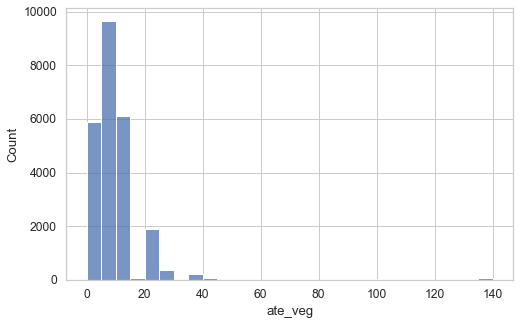

In [50]:
#I really like looking at the distribution of my variable visually - it helps me see what's going on. 
#Histograms are a powerful way of assessing the distribution of a numeric variable
#To figure out all the options for making a histogram, I will rely on online information about how to make a histogram
#https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=chis_df_small, x="ate_veg", binwidth=5)

<AxesSubplot:xlabel='ate_veg', ylabel='count'>

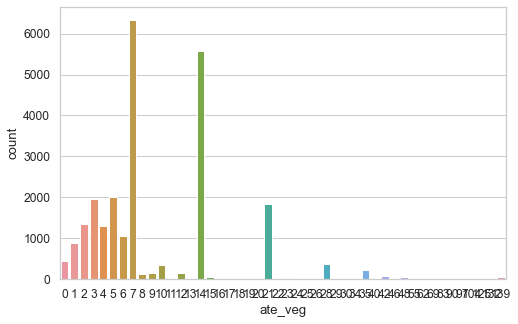

In [54]:
#because there aren't too many discrete values, we can also just plot the full range of answers
sns.countplot(data=chis_df_small, x='ate_veg')

###  4.2 Nominal Binary variables

In addition to numeric variables, we also often have to work with "nominal" variables (those with a "Name").  Note that in the CHIS data, the variables that are nominal (e.g. sex, race/ethnicity) are actually assigned number values rather than strings.   

Let's start with looking at the "sex" variable.  It has two possible values, "Male" and "Female".  This is known as a binary or dichotomous variable.  But, even though they are represented by the numbers 1 and 2, we can't treat them as numbers - e.g., adding 2 males together doesn't give us a female.

    SRSEX: Self-reported Sex (1= Male, 2=Female)


In [55]:
chis_df_small[["sex"]].head(10)

,sex
0,2
1,1
2,2
3,2
4,1
5,1
6,1
7,1
8,1
9,2


In [56]:
#A simple way to look the distribution of a binary variable is to request the value_counts()
chis_df_small[['sex']].value_counts()

sex
2      13718
1      10735
dtype: int64

In [57]:
#another approach is to use the "crosstab" function available in pandas.  We'll be using crosstabs a lot when we do ttests,
#so let's look at a simple example for now
pd.crosstab(index=chis_df_small['sex'], columns="Total")

col_0,Total
sex,
1,10735
2,13718


In [61]:
#let's get the percents
pd.crosstab(index=chis_df_small['sex'], columns="Total", normalize=True)

col_0,Total
sex,
1,0.44
2,0.56


<AxesSubplot:xlabel='sex', ylabel='count'>

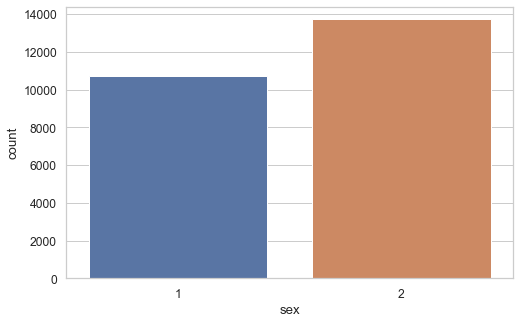

In [63]:
#we can also use the plot function above to look at the distribution visually
sns.countplot(data=chis_df_small, x='sex')

###  Categorical variables

A more complicated type of "nominal" variable is one where we have more than 2 categories - we find these all the time in planning surveys!  (And most are ordinal, meaning that the numbers assigned move either up or down in some logical way.)

   AM184: How Often Worry about Paying Rent/Mortgage (1=Very often, 2=Somewhat Often, 3=From Time to Time, 4=Almost Never)

In [64]:
pd.crosstab(index=chis_df_small["housing_worry"], columns="Total")

col_0,Total
housing_worry,
1,1189
2,1971
3,5027
4,16266


<AxesSubplot:xlabel='housing_worry', ylabel='count'>

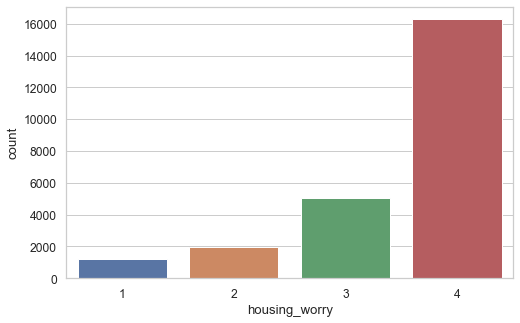

In [65]:
sns.countplot(data=chis_df_small, x='housing_worry')

In [ ]:
# Great work!!!  Explore some of the other variables on your own!